<a href="https://colab.research.google.com/github/BenjaminBoyle1/Pandas/blob/main/Student_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving study_performance.csv to study_performance.csv


   total_score  gender_female  gender_male  race_ethnicity_group A  \
0          218           True        False                   False   
1          247           True        False                   False   
2          278           True        False                   False   
3          148          False         True                    True   
4          229          False         True                   False   

   race_ethnicity_group B  race_ethnicity_group C  race_ethnicity_group D  \
0                    True                   False                   False   
1                   False                    True                   False   
2                    True                   False                   False   
3                   False                   False                   False   
4                   False                    True                   False   

   race_ethnicity_group E  parental_level_of_education_associate's degree  \
0                   False              

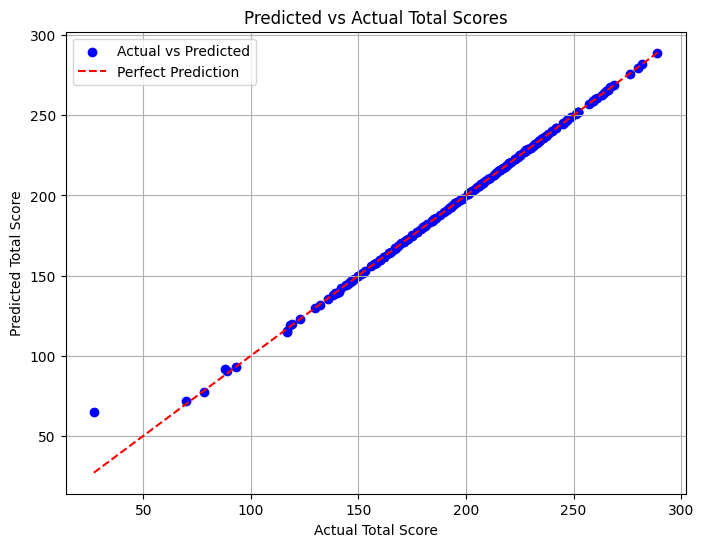

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('study_performance.csv')

# Feature Engineering: Create a new feature 'total_score' as the sum of math, reading, and writing scores
data['total_score'] = data['math_score'] + data['reading_score'] + data['writing_score']

# Encode categorical variables
data = pd.get_dummies(data, columns=['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course'])

# Split features and target variable
X = data.drop(columns=['math_score', 'reading_score', 'writing_score'])  # Features
y = data['total_score']  # Target variable (total score)

print(X.head())
print(y.head())
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Selection and Hyperparameter Tuning using Random Forest Regression
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_model = RandomForestRegressor(random_state=42)

# Reduce grid search space and use parallel processing
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search model
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Train the model with the best hyperparameters
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)

# Make predictions
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Plot predicted vs actual total scores
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Total Score')
plt.ylabel('Predicted Total Score')
plt.title('Predicted vs Actual Total Scores')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

# Load the dataset
data = pd.read_csv('study_performance.csv')

# Feature Engineering: Create a new feature 'total_score' as the sum of math, reading, and writing scores
data['total_score'] = data['math_score'] + data['reading_score'] + data['writing_score']

# Encode categorical variables
data = pd.get_dummies(data, columns=['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course'])

# Split features and target variable
X = data.drop(columns=['math_score', 'reading_score', 'writing_score'])  # Features
y = data['total_score']  # Target variable (total score)

# Initialize Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE scores to positive and calculate RMSE
rmse_scores = np.sqrt(-cv_scores)

# Print RMSE scores
print("Cross-Validation RMSE Scores:", rmse_scores)
print("Mean RMSE:", np.mean(rmse_scores))


Cross-Validation RMSE Scores: [2.70597127 0.32781168 0.3306985  0.29505084 1.15722902]
Mean RMSE: 0.9633522630701282
